In [1]:
import pandas as pd
CD4 = pd.read_csv("/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/Table/CD4_RNA_ADT_merged_2.csv", 
                  index_col=[0])


new_list = old_list
As you can see from the output both variables old_list and new_list share the same id i.e 140673303268168.
So, if you want to modify any values in new_list or old_list, the change is visible in both.
In the above program, we use deepcopy() function to create copy which looks similar.
However, if you make changes to any nested objects in original object old_list, you’ll see no changes to the copy new_list.


In [2]:
# simply assigning it using "=" make changes in the variable 
import copy
CD4_3 = copy.deepcopy(CD4)

In [2]:
who_ls

[]

In [4]:
import sys
sys.version

'3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:41:03) \n[GCC 9.4.0]'

In [6]:
print(CD4_3.shape)
print(CD4.shape)

(22188, 19961)
(22188, 19961)


# Building a proper model with optimization

In [99]:
## Data Cleaning
## Removing the column with values less than 0.1%
from numpy import unique
# making a list to append to it
res = []
res1 = []
res2 = []
res3 = []
for i in range(CD4_3.shape[1]):
    num = len(unique(CD4_3.iloc[:,i]))
    percentage = float(num) / CD4_3.shape[0] * 100
    if percentage < 0.1:
        res.append(i)
        res1.append(num)
        res2.append(percentage)

In [101]:
# converting the list to dataframe. the process is List -> Dict -> Dataframe
d = {'index':res,'num':res1,'percentage':res2}
df=pd.DataFrame(d)
print(df)
print(df.shape)

      index  num  percentage
0        49   20    0.090139
1       110    4    0.018028
2       159    9    0.040562
3       190   13    0.058590
4       194   21    0.094646
...     ...  ...         ...
4162  19916    4    0.018028
4163  19917    2    0.009014
4164  19918    2    0.009014
4165  19919    3    0.013521
4166  19960    9    0.040562

[4167 rows x 3 columns]
(4167, 3)


In [112]:
# just checking that it is removing the correct column
CD4.iloc[:,49].value_counts()

0.000000    22169
1.517320        1
0.969513        1
0.692298        1
1.102763        1
0.908149        1
0.450061        1
0.507067        1
0.510133        1
0.569210        1
0.709593        1
0.675241        1
0.767173        1
0.504819        1
1.022448        1
0.577761        1
0.952861        1
1.224736        1
0.874397        1
0.858265        1
Name: AL109917.1, dtype: int64

In [113]:
print(CD4_3.shape)
CD4_3.drop(CD4_3.columns[res[0:4165]], axis=1,inplace=True)
print(CD4_3.shape)

(22188, 19961)
(22188, 15796)


In [242]:
res[0:4165]

[49,
 110,
 159,
 190,
 194,
 199,
 304,
 340,
 368,
 405,
 430,
 436,
 457,
 462,
 467,
 478,
 480,
 501,
 505,
 528,
 554,
 561,
 580,
 603,
 607,
 613,
 620,
 624,
 649,
 650,
 653,
 656,
 657,
 660,
 699,
 707,
 738,
 741,
 747,
 760,
 795,
 829,
 844,
 869,
 874,
 884,
 899,
 903,
 908,
 931,
 943,
 974,
 1024,
 1025,
 1028,
 1033,
 1035,
 1065,
 1076,
 1087,
 1099,
 1127,
 1128,
 1140,
 1142,
 1145,
 1157,
 1170,
 1203,
 1233,
 1257,
 1299,
 1310,
 1339,
 1340,
 1355,
 1367,
 1378,
 1380,
 1390,
 1407,
 1410,
 1415,
 1423,
 1426,
 1430,
 1445,
 1452,
 1464,
 1468,
 1472,
 1488,
 1491,
 1500,
 1509,
 1516,
 1519,
 1526,
 1536,
 1585,
 1600,
 1602,
 1613,
 1620,
 1623,
 1630,
 1632,
 1639,
 1652,
 1662,
 1668,
 1673,
 1674,
 1675,
 1676,
 1686,
 1721,
 1726,
 1727,
 1737,
 1749,
 1750,
 1759,
 1770,
 1786,
 1789,
 1816,
 1828,
 1839,
 1848,
 1877,
 1878,
 1883,
 1885,
 1909,
 1953,
 1961,
 1963,
 1976,
 1984,
 2024,
 2059,
 2072,
 2079,
 2095,
 2109,
 2133,
 2149,
 2154,
 2184,
 22

In [122]:
# Remove column with low variance that we would do in feature selection. However we can use the Lasso in the feature seleciton
from sklearn.feature_selection import VarianceThreshold
data = CD4_3.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)

(22188, 15795) (22188,)


In [125]:
# define the transform
transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(22188, 15795)


In [127]:
# apply transform with each threshold
# define thresholds to check
import numpy as np
thresholds = np.arange(0.0, 0.55, 0.05)
results = list()
for t in thresholds:
	# define the transform
	transform = VarianceThreshold(threshold=t)
	# transform the input data
	X_sel = transform.fit_transform(X)
	# determine the number of input features
	n_features = X_sel.shape[1]
	print('>Threshold=%.2f, Features=%d' % (t, n_features))
	# store the result
	results.append(n_features)

>Threshold=0.00, Features=15795
>Threshold=0.05, Features=6966
>Threshold=0.10, Features=4687
>Threshold=0.15, Features=3351
>Threshold=0.20, Features=2504
>Threshold=0.25, Features=1898
>Threshold=0.30, Features=1449
>Threshold=0.35, Features=1149
>Threshold=0.40, Features=890
>Threshold=0.45, Features=671
>Threshold=0.50, Features=501


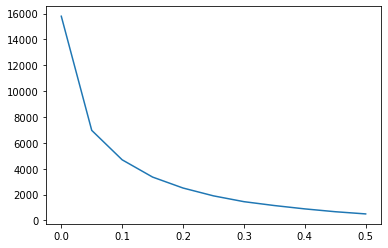

In [131]:
from matplotlib import pyplot
pyplot.plot(thresholds, results)
pyplot.show()

In [137]:
CD4_nocelltypes = CD4_3.iloc[:,:-1]

In [189]:
## if we need the features also to work with, we will look into the alternative
## Keep the variance threshold to be 0.1
transform = VarianceThreshold(threshold=0.1)
_ = transform.fit(X)
mask = transform.get_support()

In [205]:
CD4_3_nocelltype_feature_sel = CD4_3_nocelltype.iloc[:,mask]

Since we have cleaned up the columns now we will clean up the rows.
Rows that have identical data are probably useless, if not dangerously misleading during model evaluation.
remove the duplicated rows. 

The pandas function duplicated() 


In [208]:
dups = CD4_3_nocelltype_feature_sel.duplicated()
print(dups.any())
# There is no duplicated row in our dataset

False


In [214]:
df_column = CD4_3_nocelltype_feature_sel.columns

Index(['NOC2L', 'ISG15', 'TNFRSF18', 'TNFRSF4', 'SDF4', 'UBE2J2', 'AURKAIP1',
       'CCNL2', 'MRPL20', 'SSU72',
       ...
       'CD95-Fas-protein', 'CD278-ICOS-protein', 'KLRG1-MAFA-protein',
       'CD25-protein', 'CD27-protein', 'CD127-IL7R-protein', 'CD31-protein',
       'CD69-protein', 'CD62L-protein', 'CD314-NKG2D-protein'],
      dtype='object', length=4687)

In [234]:
`MT_ribo_genename = CD4_3_nocelltype_feature_sel.columns[CD4_3_nocelltype_feature_sel.columns.str.match('(MT)|(RPL)|(RPS)')]

In [251]:
CD4_4_nocelltype_feature_sel = CD4_3_nocelltype_feature_sel

In [266]:
CD4_4_nocelltype_feature_sel = CD4_3_nocelltype_feature_sel.drop(MT_ribo_genename.tolist(),axis=1)

In [267]:
CD4_4_nocelltype_feature_sel.shape

(22188, 4571)

In [268]:
CD4_4_nocelltype_feature_sel

,NOC2L,ISG15,TNFRSF18,TNFRSF4,SDF4,UBE2J2,AURKAIP1,CCNL2,MRPL20,SSU72,...,CD95-Fas-protein,CD278-ICOS-protein,KLRG1-MAFA-protein,CD25-protein,CD27-protein,CD127-IL7R-protein,CD31-protein,CD69-protein,CD62L-protein,CD314-NKG2D-protein
DMSO_BB22005_AAACCCATCACTCGAA-1,0.919785,0.919785,0.000000,1.709510,0.000000,0.000000,0.000000,0.919785,0.000000,0.000000,...,1.599700,1.057083,0.272310,0.878993,1.057083,0.662163,0.533117,1.759973,0.910965,1.455456
DMSO_BB22005_AAACGCTTCGTAGGAG-1,0.000000,1.266319,0.000000,1.266319,0.000000,0.000000,0.000000,0.000000,0.000000,1.266319,...,1.817220,1.359406,0.240041,2.302401,1.623246,0.341426,0.403721,1.510041,1.195758,1.415845
DMSO_BB22005_AAAGAACAGCAAATGT-1,1.082735,0.000000,0.000000,0.000000,0.000000,0.000000,1.082735,0.000000,1.082735,0.000000,...,0.797677,1.132723,0.408782,0.718839,2.451406,0.489334,1.960360,1.530189,2.372198,0.971232
DMSO_BB22005_AAAGAACCAAGTGATA-1,0.000000,1.435328,2.624965,2.734667,2.197509,0.955708,0.955708,0.955708,1.758123,0.000000,...,1.897337,1.665835,0.167211,2.837225,2.386945,0.401464,0.401464,1.718489,1.330268,0.999173
DMSO_BB22005_AAAGGATGTATCAAGA-1,0.000000,0.000000,1.447895,0.000000,0.965871,0.000000,0.000000,0.000000,0.000000,0.965871,...,1.419099,0.757320,0.683877,1.098893,1.381882,1.463754,0.373645,1.271758,0.495781,1.303015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gE_BB22008_TTTGGTTAGGACACTG-1,0.000000,1.230966,0.000000,1.954635,0.794018,0.794018,0.000000,0.000000,0.794018,1.230966,...,1.500781,1.098004,0.528884,1.521290,0.657201,0.770909,0.412878,1.763496,0.412878,1.128531
gE_BB22008_TTTGGTTCAACCTAAC-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.088189,0.000000,1.088189,...,1.379330,1.422404,0.273614,0.664811,1.361567,0.700152,0.734286,1.396783,1.206816,1.130773
gE_BB22008_TTTGGTTGTCAACATC-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.895122,0.617202,1.183030,0.748376,1.227511,1.100084,1.062315,1.799755,0.555250,1.596271
gE_BB22008_TTTGGTTTCAGCTCTC-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.577589,1.190488,0.417521,0.849580,1.646488,0.525275,0.575089,1.646488,0.575089,1.402653


In [703]:
CD4_celltypes = pd.DataFrame(CD4.iloc[:,-1])
CD4_celltypes.value_counts()

celltype               
EM                         5670
Tregs                      5355
CM                         4576
CM or EM                   1913
Naive or stem-cell like    1708
CD4 TEMRA                  1190
DN / NKT                    827
DP EM or non-TEMRA          808
unassigned                  141
dtype: int64

In [705]:
pd.DataFrame(CD4.iloc[:,-1])(CD4.iloc[:,-1])

TypeError: 'DataFrame' object is not callable

In [292]:
# Need to convert the cell types to the float values
CD4_celltypes_float = CD4_celltypes['celltype'].map({"EM":0,"Tregs":1,"CM":2,"CM or EM":3,"Naive or stem-cell like":4,"CD4 TEMRA":5,
                              "DN / NKT":6,"DP EM or non-TEMRA":7,"unassigned":8})
CD4_celltypes_float.value_counts()

0    5670
1    5355
2    4576
3    1913
4    1708
5    1190
6     827
7     808
8     141
Name: celltype, dtype: int64

In [710]:
pd.DataFrame(CD4.iloc[:,-1]).value_counts()

celltype               
EM                         5670
Tregs                      5355
CM                         4576
CM or EM                   1913
Naive or stem-cell like    1708
CD4 TEMRA                  1190
DN / NKT                    827
DP EM or non-TEMRA          808
unassigned                  141
dtype: int64

In [293]:
## If you go down in the section of the feature selection we have selected features based on the Lasso regression 
x = np.array(CD4_4_nocelltype_feature_sel)
y = np.array(CD4_celltypes_float)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [294]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(17750, 4571) (4438, 4571) (17750,) (4438,)


Tuning the parameter for model to learn using Lasso CV alpha values

In [297]:
# Tuning the hyper parameter i.e. alpha using the CV
# Also by looking at the graph we can say that tips are mainly correlated with total bill.
# Selecting the alpha via Cross Validation using 20-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from numpy import absolute
reg = make_pipeline(StandardScaler(), LassoCV(cv=20,tol = 0.01)).fit(xtrain, ytrain)
model = Lasso(alpha=reg[-1].alpha_,tol = 0.01)
print('alpha %.5f' % (reg[-1].alpha_))


alpha 0.03448


NameError: name 'RepeatedKFold' is not defined

In [298]:
from sklearn.model_selection import RepeatedKFold
# define the model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, xtrain, ytrain, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

NameError: name 'mean' is not defined

In [301]:
import numpy as np
from statistics import mean
# report performance
# model performance
scores = absolute(scores)
print('Mean MAE %.3f (%.3f)' %(mean(scores), np.std(scores)))
# Model Performance on test dataset
model.fit(xtrain,ytrain)
print('Model accuracy on train dataset %.3f' % (model.score(xtrain, ytrain)))
print('Model accuracy on test dataset %.3f' % (model.score(xtest, ytest)))

Mean MAE 1.527 (0.025)
Model accuracy on train dataset 0.029
Model accuracy on test dataset 0.021


In [323]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x = np.array(CD4_4_nocelltype_feature_sel)
y = CD4_celltypes["celltype"]
scaler = preprocessing.StandardScaler().fit(x)
scaler
x_scaled = scaler.transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [327]:
x_scaled

array([[ 2.40944743,  0.95851453, -0.7239188 , ...,  0.30671659,
         0.12482244,  0.74596136],
       [-0.34835152,  1.55588492, -0.7239188 , ..., -0.25079888,
         0.66896047,  0.64552458],
       [ 2.89802135, -0.62704839, -0.7239188 , ..., -0.2058565 ,
         2.91672329, -0.48182821],
       ...,
       [-0.34835152, -0.62704839, -0.7239188 , ...,  0.39545672,
        -0.55482304,  1.10301049],
       [-0.34835152, -0.62704839, -0.7239188 , ...,  0.0535688 ,
        -0.51691771,  0.61207589],
       [-0.34835152,  1.21852504, -0.7239188 , ...,  0.30671848,
        -0.88520031,  0.30357905]])

In [329]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(xtrain,ytrain)

LogisticRegression(max_iter=10000)

In [330]:
# Use score method to get accuracy of model
print(model.score(xtrain,ytrain))
print(model.score(xtest,ytest))

0.8501971830985916
0.18634520054078413


In [328]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

# Feature Selection for each cell type with Variance Threshold 0.5

In [374]:
import pandas as pd
CD4 = pd.read_csv("/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/Table/CD4_RNA_ADT_merged_2.csv", 
                  index_col=[0])

In [533]:
## Data Cleaning
## Removing the column with values less than 0.1%
from numpy import unique
# making a list to append to it
res = []
res1 = []
res2 = []
for i in range(CD4.shape[1]):
    num = len(unique(CD4.iloc[:,i]))
    percentage = float(num) / CD4.shape[0] * 100
    if percentage < 0.02:
        res.append(i)
        res1.append(num)
        res2.append(percentage)

In [534]:
# converting the list to dataframe. the process is List -> Dict -> Dataframe
d = {'index':res,'num':res1,'percentage':res2}
df=pd.DataFrame(d)
print(df.shape)

(1386, 3)


In [535]:
import copy
CD4_3 = copy.deepcopy(CD4)

In [536]:
print(CD4_3.shape)
CD4_3.drop(CD4_3.columns[res[0:len(res)-1]], axis=1,inplace=True)
print(CD4_3.shape)

(22188, 19961)
(22188, 18576)


In [537]:
MT_ribo_genename = CD4_3.columns[CD4_3.columns.str.match('(MT)|(RPL)|(RPS)')]

In [538]:
import copy
CD4_4 = copy.deepcopy(CD4_3)
print(CD4_4.shape)
CD4_4.drop(MT_ribo_genename, axis=1, inplace=True)
print(CD4_4.shape)

(22188, 18576)
(22188, 18391)


In [539]:
CD4_4.iloc[:,-1].value_counts()

EM                         5670
Tregs                      5355
CM                         4576
CM or EM                   1913
Naive or stem-cell like    1708
CD4 TEMRA                  1190
DN / NKT                    827
DP EM or non-TEMRA          808
unassigned                  141
Name: celltype, dtype: int64

Need to extract out the dataframes of each cell types than find out the Variance threshold for the features.

In [401]:
CD4_EM = CD4_4.loc[CD4_3.iloc[:,-1].str.match("EM")]

,AL627309.5,LINC01409,LINC01128,LINC00115,FAM41C,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,...,CD62L-protein,TIGIT-VSTM3-protein,CD223-LAG3-protein,CD366-Tim3-protein,CD16-protein,CD85j-ILT2-protein,CD314-NKG2D-protein,CD63-protein,CD335-NKp46-protein,celltype
DMSO_BB22005_AAAGGATTCACCGGGT-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.236400,...,0.402974,0.303415,0.514921,0.671458,0.034834,0.354433,1.128629,0.911802,0.514921,EM
DMSO_BB22005_AACCATGGTTGCATTG-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,2.155831,0.209763,0.236436,0.641961,0.209763,0.236436,1.087589,0.641961,0.587887,EM
DMSO_BB22005_AACGGGATCGGCGATC-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.373018,...,2.476922,0.372836,0.351870,0.705168,0.058501,0.286197,1.226668,0.776937,0.508448,EM
DMSO_BB22005_AAGCCATTCAACGAGG-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.719843,...,1.600385,0.185535,0.451595,0.722748,0.078391,0.251076,1.316880,0.780427,0.312584,EM
DMSO_BB22005_AAGGAATAGTCCTGCG-1,0.0,0.0,0.0,0.0,0.0,0.865613,0.0,0.0,0.0,0.865613,...,1.594292,0.487337,0.420887,0.741440,0.190062,0.312120,1.299890,0.549645,0.608297,EM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gE_BB22008_TTTCCTCTCTGAATGC-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.084546,...,0.797257,0.517286,0.433064,0.517286,0.000000,0.239794,0.856514,0.797257,0.433064,EM
gE_BB22008_TTTGGAGTCTTTCAGT-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,1.153796,0.474778,0.501418,0.795394,0.042489,0.329762,1.395820,0.852510,0.527367,EM
gE_BB22008_TTTGGTTAGGACACTG-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.230966,...,0.412878,0.170482,0.501120,0.657201,0.045422,0.349404,1.128531,0.872997,0.412878,EM
gE_BB22008_TTTGGTTTCAGCTCTC-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.575089,0.328328,0.358951,0.732160,0.230394,0.264116,1.402653,0.732160,0.230394,EM


In [540]:
celltypes = unique(CD4_4.iloc[:,-1])

# Removing the unassigned from the array
import numpy as np
celltypes_3 = np.delete(celltypes,8)

for p in range(len(celltypes_3)):
    df = CD4_4.loc[CD4_4.iloc[:,-1] == (celltypes_3[p])]
    celltypes_2[p] = df

In [541]:
## To check whether the extraction is correct or not
for p in range(8):
    print(celltypes_2[p].shape)

CD4_4.iloc[:,-1].value_counts()

(1190, 18391)
(4576, 18391)
(1913, 18391)
(827, 18391)
(808, 18391)
(5670, 18391)
(1708, 18391)
(5355, 18391)


EM                         5670
Tregs                      5355
CM                         4576
CM or EM                   1913
Naive or stem-cell like    1708
CD4 TEMRA                  1190
DN / NKT                    827
DP EM or non-TEMRA          808
unassigned                  141
Name: celltype, dtype: int64

In [542]:
res = [] # assigning a list
for i in celltypes_unique.tolist():
    new = i.replace(' ','_').replace('DN_/',"DN")
    res.append(new)

In [543]:
celltype_dict = {}
for p in range(8):
    celltype_dict[res[p]] = celltypes_2[p]

In [544]:
len(celltype_dict)

8

In [545]:
for p in range(len(celltype_dict)):
    print(celltype_dict[res[p]].shape)

(1190, 18391)
(4576, 18391)
(1913, 18391)
(827, 18391)
(808, 18391)
(5670, 18391)
(1708, 18391)
(5355, 18391)


In [546]:
celltype_dict.keys()

dict_keys(['CD4_TEMRA', 'CM', 'CM_or_EM', 'DN_NKT', 'DP_EM_or_non-TEMRA', 'EM', 'Naive_or_stem-cell_like', 'Tregs'])

## Variance Threshold for each celltype keeping threshold 0.5

In [558]:
from sklearn.feature_selection import VarianceThreshold
data = celltype_dict[res[p]].values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)

(5355, 18390) (5355,)


In [615]:
# define the transform
transform = VarianceThreshold(threshold=0.5)
# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(5355, 420)


### Alternative way to perform the variance threshold to identify the features also

In [617]:
# since from the X we have removed the column with the cell type, so we will make a dataframe which will remove the cell types
CD4_nocelltype = pd.DataFrame(celltype_dict[res[p]]).iloc[:,:-1]
CD4_nocelltype.shape

(5355, 18390)

In [619]:
features = {} # making a dict where selected features will be map to the values

from sklearn.feature_selection import VarianceThreshold
for ct in res:
    data = celltype_dict[ct].values
    X = data[:, :-1]
    y = data[:, -1]
    print(X.shape, y.shape)
    transform = VarianceThreshold(threshold=0.5)
    _ = transform.fit(X)
    mask = transform.get_support()
    features[ct] = CD4_nocelltype.iloc[:,mask].columns

(1190, 18390) (1190,)
(4576, 18390) (4576,)
(1913, 18390) (1913,)
(827, 18390) (827,)
(808, 18390) (808,)
(5670, 18390) (5670,)
(1708, 18390) (1708,)
(5355, 18390) (5355,)


In [622]:
for i in res:
    print(features[i])

Index(['TNFRSF18', 'TNFRSF4', 'PARK7', 'ENO1', 'TNFRSF1B', 'HP1BP3', 'CDC42',
       'SRRM1', 'SYF2', 'RSRP1',
       ...
       'COX7B', 'PGK1', 'P2RY10', 'ITM2A', 'TSC22D3', 'SEPTIN6', 'NDUFA1',
       'STAG2', 'SSR4', 'CD25-protein'],
      dtype='object', length=561)
Index(['TNFRSF18', 'TNFRSF4', 'PARK7', 'ENO1', 'TNFRSF1B', 'HP1BP3', 'CDC42',
       'SRRM1', 'SYF2', 'RSRP1',
       ...
       'ATRX', 'COX7B', 'PGK1', 'P2RY10', 'TSC22D3', 'SEPTIN6', 'NDUFA1',
       'SSR4', 'DDX3Y', 'CD25-protein'],
      dtype='object', length=502)
Index(['TNFRSF18', 'TNFRSF4', 'PARK7', 'ENO1', 'TNFRSF1B', 'HP1BP3', 'CDC42',
       'SRRM1', 'SYF2', 'RSRP1',
       ...
       'IL2RG', 'XIST', 'ATRX', 'COX7B', 'PGK1', 'TSC22D3', 'SEPTIN6',
       'NDUFA1', 'SSR4', 'CD25-protein'],
      dtype='object', length=477)
Index(['TNFRSF18', 'TNFRSF4', 'PARK7', 'ENO1', 'TNFRSF1B', 'HP1BP3', 'CDC42',
       'SRRM1', 'SYF2', 'RSRP1',
       ...
       'IL2RG', 'ATRX', 'COX7B', 'PGK1', 'ITM2A', 'TSC22D3', 'NDUF

In [610]:
CD4_nocelltype_masked = CD4_nocelltype.iloc[:,mask]

In [613]:
bool = CD4_nocelltype_masked.columns.str.match("IL2RA")

In [614]:
CD4_nocelltype_masked.iloc[:,bool]

,IL2RA
DMSO_BB22005_AGCCAGCTCAGCGTCG-1,3.714282
DMSO_BB22005_AGGCCACAGTTGCTCA-1,3.213163
DMSO_BB22005_AGTAGCTCAATGCAAA-1,0.905069
DMSO_BB22005_ATCACAGTCTCCCATG-1,0.000000
DMSO_BB22005_ATCCATTCAGAACCGA-1,3.345302
...,...
gE_BB22008_TTTATGCCAGCATACT-1,1.384460
gE_BB22008_TTTCACAAGGGTGAGG-1,0.000000
gE_BB22008_TTTCACAGTAACCCGC-1,0.880717
gE_BB22008_TTTCAGTGTTTCACAG-1,0.000000


In [616]:
res

['CD4_TEMRA',
 'CM',
 'CM_or_EM',
 'DN_NKT',
 'DP_EM_or_non-TEMRA',
 'EM',
 'Naive_or_stem-cell_like',
 'Tregs']

### Feature Selection
Feature selection by separating out each cell types does not provide much better result as all the cell types are more over providing the same result.

We will be use Recursive Feature Elimination that is wrapper to select the subset of the features.

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

### But RFE is very slow, we cannot use for so many features.
Need to use LASSO or Ridge regression to decrease it.


In [624]:
import sklearn
print(sklearn.__version__)

1.0.2


In [633]:
data = CD4_3.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)

(22188, 18575) (22188,)


In [632]:
# define the method
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=300)
# fit the model
scaler = preprocessing.StandardScaler().fit(X)
print(scaler)
X_scaled = scaler.transform(X)

rfe.fit(X_scaled, y)
# transform the data
X, y = rfe.transform(X_scaled, y)

StandardScaler()


KeyboardInterrupt: 

In [ ]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create pipeline
rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)
model = LogisticRegression(max_iter=1000)
pipeline = Pipeline(steps=[('standardscaler', StandardScaler()),('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

### Univariate feature selection
SelectKBest removes all but the highest scoring features

SelectPercentile removes all but a user-specified highest scoring percentage of features using common univariate statistical tests for each feature: false positive rate SelectFpr, false discovery rate SelectFdr, or family wise error SelectFwe.

GenericUnivariateSelect allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.

In [646]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print(X.shape)
X_new = SelectKBest(chi2, k=3000).fit_transform(X,y)
print(X_new.shape)

(22188, 18575)
(22188, 3000)


In [647]:
scaler = preprocessing.StandardScaler().fit(X_new)
scaler
X_scaled = scaler.transform(X_new)

In [648]:
X_scaled.shape

(22188, 3000)

In [649]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = LogisticRegression(max_iter=1000)
# evaluate model
scores = cross_val_score(model, X_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)

/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/miniconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/miniconda3/lib/python3.9/site-packages/sklearn/l

/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation f

In [650]:
import numpy as np
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), np.std(scores)))

Accuracy: 0.250 (0.008)


Getting very bad accuracy around 0.250

### L1-based feature selection
Lasso used for regression, LogisticRegression and Linear SVC for classification

In [652]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
print(X.shape)
lsvc = LinearSVC(C=0.01, penalty="l1",dual=False).fit(X,y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print(X_new.shape)

(22188, 18575)


/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(22188, 4168)


In [653]:
scaler = preprocessing.StandardScaler().fit(X_new)
scaler
X_scaled = scaler.transform(X_new)

In [660]:
X_scaled.shape

(22188, 4168)

In [658]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = LogisticRegression(max_iter=1000)
# evaluate model
scores = cross_val_score(model, X_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)

/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation f

/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation f

In [659]:
import numpy as np
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), np.std(scores)))

Accuracy: 0.226 (0.009)


# Using Support Vector Machine 
SVM: also create the hyperplane to separate out based on the support vector to the line. The hyperplane in which both the distances from different clusters are the same. Those are known as support vectors. This could be the straight line or the polynomials. Basically Kernels provide the dimension to differentiate between the groups.

The advantages of support vector machines are:
1. Effective in high dimensional spaces.
2. Still effective in cases where number of dimensions is greater than the number of samples.
3. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
4. Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

Disadvantages:
1. If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
2. SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).


In the SVM we will use the CD4 scCITESeq dataset initial we will remove all cell types that is DN DP and unassigned.

In [7]:
# We get both the dataset from the Seurat. In Seurat we have done the Normalization, FindVariableFeature, scaling, RunPCA, and RunUMAP
# It provided us the 2000 variable features that we use for the training, validating, and testing our model.

import pandas as pd
CD4_scaled = pd.read_csv("/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_scale_data.csv", 
                         index_col=[0])
CD4_celltypes = pd.read_csv("/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_celltypes.csv")


In [8]:
CD4_celltypes.iloc[:,-1].value_counts()

EM_CM                   12159
Tregs                    5355
Naive_stem_cell_like     1708
CD4_TEMRA                1190
Name: x, dtype: int64

In [9]:
CD4_celltypes_float = CD4_celltypes.iloc[:,-1].map({"EM_CM":0,"Tregs":1,"Naive_stem_cell_like":2,"CD4_TEMRA":3})
CD4_celltypes_float.value_counts()

0    12159
1     5355
2     1708
3     1190
Name: x, dtype: int64

In [10]:
print(CD4_scaled.shape,CD4_celltypes_float.shape)

(20412, 2000) (20412,)


In [11]:
X = CD4_scaled.values
y = CD4_celltypes_float.values

In [12]:
print(X.shape,y.shape)

(20412, 2000) (20412,)


In [13]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42) 


In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16329, 2000) (4083, 2000) (16329,) (4083,)


In [734]:
help(svm.SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [15]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Radial Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [16]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8968895420034289


In [738]:
## Saving the model
import joblib
joblib.dump(clf,"/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_SVM_rbf_Run02_03_classifier.joblib")


['/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_SVM_rbf_Run02_03_classifier.joblib']

### Performing the testing on the Rerun01
Here also we will use the scale data from the rerun as with the same 2000 features as we have in the training model. We will get that from the Seurat normalization and scaling.

In [ ]:
# Loading the model
import joblib
joblib.load("/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_SVM_rbf_Run02_03_classifier.joblib")

In [ ]:
import pandas as pd
CD4_rerun01_scaled = pd.read_csv("/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_rerun01_scale_data.csv", 
                         index_col=[0])

In [760]:
X_test_2 = CD4_rerun01_scaled.values

In [762]:
y_pred_2 = clf.predict(X_test_2)

In [32]:
np.unique(y_pred_2, return_counts=True)

NameError: name 'y_pred_2' is not defined

In [18]:
import pandas as pd
CD4_rerun01_scaled_match = pd.read_csv("/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/rerun01_req_feature_normdata_2_ordered_scaled.csv",
                         index_col=[0])

In [19]:
X_test_3 = CD4_rerun01_scaled_match.values

In [25]:
X_test_3[:,:2000].shape

(3585, 2000)

In [27]:
y_pred_3 = clf.predict(X_test_3[:,:2000])

In [29]:
import numpy as np
np.unique(y_pred_3, return_counts=True)

(array([0, 1, 2]), array([3566,   18,    1]))

### Trying with the Logistic Regression
We have used the SVM, now we are trying with the LR. Using the selected features from the seurat normalization. 
Logistic Regression is comparitively slower than that of SVM. Also it requires lot of iteration for training.

In [36]:
from sklearn.model_selection import RepeatedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = LogisticRegression(max_iter=10000)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [38]:
import numpy as np
from statistics import mean
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), np.std(scores)))

Accuracy: 0.835 (0.010)


In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.score(X_test, y_test)

In [746]:
## Saving the model
import joblib
joblib.dump(model,"/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_LR_Run02_03_classifier.joblib")


['/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_LR_Run02_03_classifier.joblib']

In [755]:
## To load the trained model
model = joblib.load('/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_LR_Run02_03_classifier.joblib')


In [777]:
y_pred_2 = model.predict(X_test_2)

In [781]:
np.unique(y_pred_2, return_counts=True)

(array([0, 1, 2, 3]), array([2478,  952,  150,    5]))

In [788]:
y_pred_2_df = pd.DataFrame(y_pred_2.tolist())

In [803]:
y_pred_2_df_cell_annotation = pd.DataFrame(y_pred_2_df.iloc[:,-1].map({0:"EM_CM",1:"Tregs",2:"Naive_stem_cell_like",3:"CD4_TEMRA"}))


In [806]:
y_pred_2_df_cell_annotation.to_csv('/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/celltype_annotation.csv',
                                  header=False,index=False)


## Merged Rerun01 and Run02 and Run03
This might bring at the same space and we donot have to do the Harmony

In [40]:
# We get both the dataset from the Seurat. In Seurat we have done the Normalization, FindVariableFeature, scaling, RunPCA, and RunUMAP
# It provided us the 2000 variable features that we use for the training, validating, and testing our model.

import pandas as pd
Run123_scaled = pd.read_csv("/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/Run1_2_3_scale_data.csv", 
                         index_col=[0])
Run123_celltypes = pd.read_csv("/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/Run1_2_3_celltypes.csv")


In [41]:
Run123_celltypes.iloc[:,-1].value_counts()

EM_CM                   13987
Tregs                    5771
Naive_stem_cell_like     2342
CD4_TEMRA                1897
Name: x, dtype: int64

In [70]:
Run123_celltypes_float = Run123_celltypes.iloc[:,-1].map({"EM_CM":0,"Tregs":1,"Naive_stem_cell_like":2,"CD4_TEMRA":3})
Run123_celltypes_float.value_counts()


0    13987
1     5771
2     2342
3     1897
Name: x, dtype: int64

In [57]:
index_list = Run123_scaled.index.tolist()

In [66]:
Run01_count = len([s for s in index_list if "Run01" in s])

In [71]:
print(Run123_scaled.shape,Run123_celltypes_float.shape)

(23997, 2000) (23997,)


In [76]:
X = Run123_scaled.values
y = Run123_celltypes_float.values

In [84]:
print(X.shape,y.shape)

(23997, 2000) (23997,)


Import train_test_split function
from sklearn.model_selection import train_test_split

Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42) 

Since we already know the put together the data, our new data is in this one only so we will train it again and implement it so we make the X_train, X_test, y_train, and y_test.

In [88]:
X_test = X[:Run01_count,:]
X_train = X[Run01_count:,:]
y_test = y[:Run01_count]
y_train = y[Run01_count:]

In [89]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20412, 2000) (3585, 2000) (20412,) (3585,)


In [92]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Radial Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [100]:
y_pred.tolist()

AttributeError: 'list' object has no attribute 'counts'

In [93]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8518828451882845


In [ ]:
## Saving the model
import joblib
joblib.dump(clf,"/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_SVM_rbf_Run02_03_classifier.joblib")


### Getting the features from the Seurat and transforming and scaling it here so that both of them are on same scale
Here we have used the raw count dataset and scaling using the StandardScaler using sklearn

In [2]:
# We get both the dataset from the Seurat. In Seurat we have done the Normalization, FindVariableFeature, scaling, RunPCA, and RunUMAP
# It provided us the 2000 variable features that we use for the training, validating, and testing our model.

import pandas as pd
X_train = pd.read_csv("/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_req_counts.csv", 
                         index_col=[0])
y_train = pd.read_csv("/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_req_celltypes.csv")


In [3]:
X_test = pd.read_csv("/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/rerun01_req_counts.csv", 
                         index_col=[0])
y_test = pd.read_csv("/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/rerun_celltypes.csv")



In [4]:
y_train.iloc[:,-1].value_counts()

EM_CM                   12159
Tregs                    5355
Naive_stem_cell_like     1708
CD4_TEMRA                1190
Name: x, dtype: int64

In [5]:
y_train_float = y_train.iloc[:,-1].map({"EM_CM":0,"Tregs":1,"Naive_stem_cell_like":2,"CD4_TEMRA":3})
y_train_float.value_counts()


0    12159
1     5355
2     1708
3     1190
Name: x, dtype: int64

In [6]:
y_test.iloc[:,-1].value_counts()

EM_CM                   1828
CD4_TEMRA                707
Naive_stem_cell_like     634
Tregs                    416
Name: x, dtype: int64

In [7]:
y_test_float = y_test.iloc[:,-1].map({"EM_CM":0,"Tregs":1,"Naive_stem_cell_like":2,"CD4_TEMRA":3})
y_test_float.value_counts()


0    1828
3     707
2     634
1     416
Name: x, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
print(X_train_scaled,X_test_scaled)

[[-0.0571092  -0.51594669 -0.46648965 ... -0.01747408 -0.01322867
  -0.00939102]
 [-0.0571092   0.45568389 -0.46648965 ... -0.01747408 -0.01322867
  -0.00939102]
 [-0.0571092   0.45568389 -0.46648965 ... -0.01747408 -0.01322867
  -0.00939102]
 ...
 [-0.0571092   0.45568389 -0.46648965 ... -0.01747408 -0.01322867
  -0.00939102]
 [-0.0571092  -0.51594669 -0.11680229 ... -0.01747408 -0.01322867
  -0.00939102]
 [-0.0571092  -0.51594669 -0.46648965 ... -0.01747408 -0.01322867
  -0.00939102]] [[-0.0571092  -0.51594669 -0.46648965 ... -0.01747408 -0.01322867
  -0.00939102]
 [-0.0571092  -0.51594669 -0.46648965 ... -0.01747408 -0.01322867
  -0.00939102]
 [-0.0571092  -0.51594669  0.23288506 ... -0.01747408 -0.01322867
  -0.00939102]
 ...
 [-0.0571092   9.20035914 -0.46648965 ... -0.01747408 -0.01322867
  -0.00939102]
 [-0.0571092   1.42731447 -0.46648965 ... -0.01747408 -0.01322867
  -0.00939102]
 [-0.0571092   2.39894506 -0.46648965 ... -0.01747408 -0.01322867
  -0.00939102]]


In [10]:
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

(20412, 2202) (3585, 2202) (20412, 1) (3585, 1)


In [11]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Radial Kernel

#Train the model using the training sets
clf.fit(X_train_scaled, y_train_float)

#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)

In [12]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_float, y_pred))

Accuracy: 0.7640167364016737


## Standard Scaler for the normalized raw data


In [13]:
# We get both the dataset from the Seurat. In Seurat we have done the Normalization, FindVariableFeature, scaling, RunPCA, and RunUMAP
# It provided us the 2000 variable features that we use for the training, validating, and testing our model.

import pandas as pd
X_train = pd.read_csv("/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_req_data.csv", 
                         index_col=[0])
y_train = pd.read_csv("/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_req_celltypes.csv")


In [14]:
X_test = pd.read_csv("/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/rerun01_req_data.csv", 
                         index_col=[0])
y_test = pd.read_csv("/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/rerun_celltypes.csv")



In [15]:
y_train.iloc[:,-1].value_counts()

y_train_float = y_train.iloc[:,-1].map({"EM_CM":0,"Tregs":1,"Naive_stem_cell_like":2,"CD4_TEMRA":3})
y_train_float.value_counts()


y_test.iloc[:,-1].value_counts()

y_test_float = y_test.iloc[:,-1].map({"EM_CM":0,"Tregs":1,"Naive_stem_cell_like":2,"CD4_TEMRA":3})
y_test_float.value_counts()


0    1828
3     707
2     634
1     416
Name: x, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled,X_test_scaled)

print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)


[[-0.08131129 -0.63396042 -0.7550032  ... -0.01739297 -0.01343039
  -0.00987231]
 [-0.08131129  1.13665094 -0.7550032  ... -0.01739297 -0.01343039
  -0.00987231]
 [-0.08131129  0.72126321 -0.7550032  ... -0.01739297 -0.01343039
  -0.00987231]
 ...
 [-0.08131129  1.08503317 -0.7550032  ... -0.01739297 -0.01343039
  -0.00987231]
 [-0.08131129 -0.63396042  0.18704244 ... -0.01739297 -0.01343039
  -0.00987231]
 [-0.08131129 -0.63396042 -0.7550032  ... -0.01739297 -0.01343039
  -0.00987231]] [[-0.08131129 -0.63396042 -0.7550032  ... -0.01739297 -0.01343039
  -0.00987231]
 [-0.08131129 -0.63396042 -0.7550032  ... -0.01739297 -0.01343039
  -0.00987231]
 [-0.08131129 -0.63396042  0.60114964 ... -0.01739297 -0.01343039
  -0.00987231]
 ...
 [-0.08131129  4.01124113 -0.7550032  ... -0.01739297 -0.01343039
  -0.00987231]
 [-0.08131129  2.23781282 -0.7550032  ... -0.01739297 -0.01343039
  -0.00987231]
 [-0.08131129  2.95214063 -0.7550032  ... -0.01739297 -0.01343039
  -0.00987231]]
(20412, 2202) (3

In [17]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Radial Kernel

#Train the model using the training sets
clf.fit(X_train_scaled, y_train_float)

#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_float, y_pred))

Accuracy: 0.7807531380753138


In [27]:
y_test_float.value_counts()

0    1828
3     707
2     634
1     416
Name: x, dtype: int64

In [34]:
type(y_test_float)

pandas.core.series.Series

In [37]:
y_list = y_pred.tolist()
import collections
counter = collections.Counter(y_list)

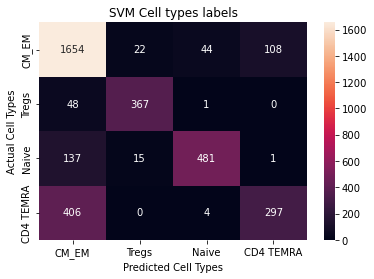

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_float,y_pred)
## Call the heatmap() function from the Seaborn Library.
## annot=True annotates cells.
## fmt='g' disables scientific notation.
## The heatmap() function returns a Matplotlib Axes Object.
ax = sns.heatmap(cm, annot=True, fmt='g');
## Modify the Axes Object directly to set various attributes such as the
## Title, X/Y Labels.
ax.set_title('SVM Cell types labels');
ax.set_xlabel('Predicted Cell Types')
ax.set_ylabel('Actual Cell Types');
## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(['CM_EM', 'Tregs', 'Naive', 'CD4 TEMRA'])
ax.yaxis.set_ticklabels(['CM_EM', 'Tregs', 'Naive', 'CD4 TEMRA'])
## Finally call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

In [49]:
import numpy as np
np.unique(y_pred, return_counts=True)
y_pred_df = pd.DataFrame(y_pred.tolist())
y_pred_df_cell_annotation = pd.DataFrame(y_pred_df.iloc[:,-1].map({0:"EM_CM",1:"Tregs",2:"Naive_stem_cell_like",3:"CD4_TEMRA"}))


In [50]:
y_pred_df_cell_annotation

,0
0,CD4_TEMRA
1,EM_CM
2,EM_CM
3,EM_CM
4,CD4_TEMRA
...,...
3580,CD4_TEMRA
3581,EM_CM
3582,EM_CM
3583,EM_CM


In [51]:
y_pred_df_cell_annotation.to_csv('/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/celltype_annotation_rerun01.csv',
                                  header=False,index=False)


### Performing with the Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled,y_train_float)
model.score(X_test_scaled, y_test_float)

0.7179916317991631

In [54]:
y_pred_LR = model.predict(X_test_scaled)

In [55]:
import numpy as np
np.unique(y_pred_LR, return_counts=True)
y_pred_LR_df = pd.DataFrame(y_pred_LR.tolist())
y_pred_LR_df_cell_annotation = pd.DataFrame(y_pred_LR_df.iloc[:,-1].map({0:"EM_CM",1:"Tregs",2:"Naive_stem_cell_like",3:"CD4_TEMRA"}))

In [56]:
y_pred_LR_df_cell_annotation.to_csv('/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/celltype_annotation_rerun01_LR.csv',
                                  header=False,index=False)

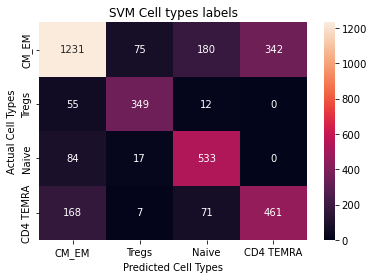

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_float,y_pred_LR)
## Call the heatmap() function from the Seaborn Library.
## annot=True annotates cells.
## fmt='g' disables scientific notation.
## The heatmap() function returns a Matplotlib Axes Object.
ax = sns.heatmap(cm, annot=True, fmt='g');
## Modify the Axes Object directly to set various attributes such as the
## Title, X/Y Labels.
ax.set_title('LR Cell types labels');
ax.set_xlabel('Predicted Cell Types')
ax.set_ylabel('Actual Cell Types');
## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(['CM_EM', 'Tregs', 'Naive', 'CD4 TEMRA'])
ax.yaxis.set_ticklabels(['CM_EM', 'Tregs', 'Naive', 'CD4 TEMRA'])
## Finally call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

In [ ]:
## Saving the model
import joblib
joblib.dump(model,"/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_LR_Run02_03_classifier.joblib")

# Random Forest

In [58]:
#Import svm model
from sklearn.ensemble import RandomForestClassifier

#Create a Randomforest Classifier
rfc = RandomForestClassifier(n_estimators = 100) 

#Train the model using the training sets
rfc.fit(X_train_scaled, y_train_float)

#Predict the response for test dataset
y_pred = rfc.predict(X_test_scaled)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_float, y_pred))

Accuracy: 0.7919107391910739


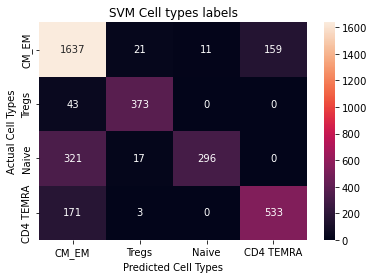

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_float,y_pred)
## Call the heatmap() function from the Seaborn Library.
## annot=True annotates cells.
## fmt='g' disables scientific notation.
## The heatmap() function returns a Matplotlib Axes Object.
ax = sns.heatmap(cm, annot=True, fmt='g');
## Modify the Axes Object directly to set various attributes such as the
## Title, X/Y Labels.
ax.set_title('Random Forest Cell types labels');
ax.set_xlabel('Predicted Cell Types')
ax.set_ylabel('Actual Cell Types');
## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(['CM_EM', 'Tregs', 'Naive', 'CD4 TEMRA'])
ax.yaxis.set_ticklabels(['CM_EM', 'Tregs', 'Naive', 'CD4 TEMRA'])
## Finally call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

In [61]:
import numpy as np
np.unique(y_pred, return_counts=True)
y_pred_df = pd.DataFrame(y_pred.tolist())
y_pred_df_cell_annotation = pd.DataFrame(y_pred_df.iloc[:,-1].map({0:"EM_CM",1:"Tregs",2:"Naive_stem_cell_like",3:"CD4_TEMRA"}))

y_pred_df_cell_annotation.to_csv('/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/celltype_annotation_rerun01_RF.csv',
                                  header=False,index=False)


# Naive Bayes Guassian

In [62]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train_float)
y_pred = gnb.predict(X_test_scaled)

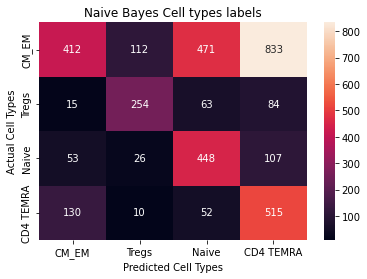

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_float,y_pred)
## Call the heatmap() function from the Seaborn Library.
## annot=True annotates cells.
## fmt='g' disables scientific notation.
## The heatmap() function returns a Matplotlib Axes Object.
ax = sns.heatmap(cm, annot=True, fmt='g');
## Modify the Axes Object directly to set various attributes such as the
## Title, X/Y Labels.
ax.set_title('Naive Bayes Cell types labels');
ax.set_xlabel('Predicted Cell Types')
ax.set_ylabel('Actual Cell Types');
## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(['CM_EM', 'Tregs', 'Naive', 'CD4 TEMRA'])
ax.yaxis.set_ticklabels(['CM_EM', 'Tregs', 'Naive', 'CD4 TEMRA'])
## Finally call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

In [65]:
a# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_float, y_pred))

Accuracy: 0.45439330543933054


# SGD Classifier with Logistic Regression

In [68]:
from sklearn.linear_model import SGDClassifier
sgclf = SGDClassifier(loss="log", penalty="l2")
sgclf.fit(X_train_scaled,y_train_float)
y_pred = sgclf.predict(X_test_scaled)

In [70]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_float, y_pred))

Accuracy: 0.7718270571827057


# SGD Classifier with Linear SVM

In [71]:
from sklearn.linear_model import SGDClassifier
sgclf = SGDClassifier(loss="hinge", penalty="l2")
sgclf.fit(X_train_scaled,y_train_float)
y_pred = sgclf.predict(X_test_scaled)

In [73]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_float, y_pred))

Accuracy: 0.7746164574616458


# Merging RNA and ADT dataset
We are including the ADT features also for better prediction of the cell types

In [1]:
# We get both the dataset from the Seurat. In Seurat we have identified the variable features for both the RNA (2500) and ADT (10).
# The features has been merged with their raw counts
maindir = "/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/"
import pandas as pd
X_train = pd.read_csv(maindir+"CD4_req_count_RNA_ADT.csv",index_col=[0])
y_train = pd.read_csv(maindir+"CD4_req_celltypes.csv")

In [11]:
y_train_values

array([2, 0, 3, ..., 0, 0, 0])

In [10]:
y_train.iloc[:,-1].value_counts()
y_train_float = y_train.iloc[:,-1].map({"EM_CM":0,"Tregs":1,"Naive_stem_cell_like":2,"CD4_TEMRA":3})
y_train_float.value_counts()
y_train_values = y_train_float.values

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [12]:
print(X_train_scaled.shape,y_train_values.shape)

(20412, 2510) (20412,)


In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16329, 2510) (4083, 2510) (16329,) (4083,)


In [15]:
from sklearn.model_selection import RepeatedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = LogisticRegression(max_iter=10000)
# evaluate model
scores = cross_val_score(model, X_train_scaled, y_train_values, scoring='accuracy', cv=cv, n_jobs=-1)

import numpy as np
from statistics import mean
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), np.std(scores)))

Accuracy: 0.833 (0.007)


In [18]:
#Import svm model
from sklearn.ensemble import RandomForestClassifier

#Create a svm Classifier
model = RandomForestClassifier(n_estimators = 100) # Radial Kernel

# evaluate model
scores = cross_val_score(model, X_train_scaled, y_train_values, scoring='accuracy', cv=cv, n_jobs=-1)

import numpy as np
from statistics import mean
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), np.std(scores)))

Accuracy: 0.882 (0.007)


## How to compare multiple classification models at a instance

In [4]:
# We get both the dataset from the Seurat. In Seurat we have identified the variable features for both the RNA (2500) and ADT (10).
# The features has been merged with their raw counts
maindir = "/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/"
import pandas as pd
X_train = pd.read_csv(maindir+"reference.csv",index_col=[0])
y_train = pd.read_csv(maindir+"reference_celltypes.csv")
y_train.iloc[:,-1].value_counts()
y_train_float = y_train.iloc[:,-1].map({"EM_CM":0,"Tregs":1,"Naive_stem_cell_like":2,"CD4_TEMRA":3})
y_train_float.value_counts()
y_train_values = y_train_float.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled.shape,y_train_values.shape)

(20412, 2487) (20412,)


In [15]:
reset-f

In [1]:
%who_ls

[]

LR: 0.833170 (0.009583) 1441.2223763465881 seconds
LDA: 0.878045 (0.006067) 574.2151398658752 seconds
KNN: 0.673966 (0.014555) 73.36570286750793 seconds
DTC: 0.823502 (0.005905) 370.6898281574249 seconds
NB: 0.338396 (0.009659) 42.763768434524536 seconds
SVM: 0.878535 (0.006090) 9588.5912835598 seconds
RF: 0.881981 (0.006651) 263.3356454372406 seconds
GBC: 0.902867 (0.006027) 7888.890916824341 seconds
SGD: 0.839277 (0.008482) 812.2217900753021 seconds
LGBM: 0.912388 (0.006583) 193.18957591056824 seconds
XGB: 0.911816 (0.005648) 2105.9630732536316 seconds


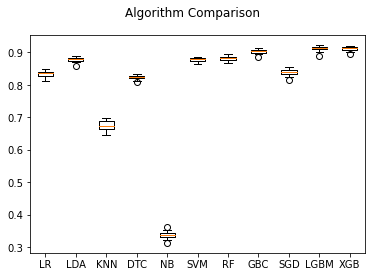

In [31]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from datetime import datetime
import time
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=10000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf')))
models.append(("RF", RandomForestClassifier(n_estimators = 100)))
models.append(("GBC", GradientBoostingClassifier(n_estimators=100)))
models.append(("SGD", SGDClassifier(loss="log", penalty="l2")))
models.append(("LGBM", LGBMClassifier(objective='multiclass', random_state=5)))
models.append(("XGB",XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    start_time = time.time()
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=seed)
    cv_results = cross_val_score(model, X_train_scaled, y_train_values, cv=cv, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f) %s seconds" % (name, cv_results.mean(), cv_results.std(), time.time() - start_time)
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [26]:
from lightgbm import LGBMClassifier

In [25]:
pip install lightgbm

     |████████████████████████████████| 2.0 MB 1.8 MB/s            
Note: you may need to restart the kernel to use updated packages.


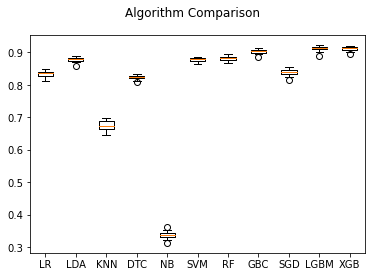

In [38]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [2]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y_train["x"].values)`

In [21]:
y_train_values

array([2, 0, 3, ..., 0, 0, 0])

In [5]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RepeatedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
model = LGBMClassifier(objective='multiclass',random_state=5)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=7)
cv_results = cross_val_score(model, X_train_scaled, y_train_values, cv=cv, scoring="accuracy", n_jobs=-1)
print(cv_results.mean())

0.9273956692248986


In [6]:
# training a model
model.fit(X_train_scaled,y_train_float.values)

LGBMClassifier(objective='multiclass', random_state=5)

In [4]:
import joblib
joblib.dump(model,"/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_LGBMC_Run02_03_classifier.joblib")

['/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_LGBMC_Run02_03_classifier.joblib']

In [2]:
import joblib
model = joblib.load('/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_LGBMC_Run02_03_classifier.joblib')


# Performing the model on CD4 Young from Run03 and 05

In [7]:
# We have trained our model on 2500 RNA features and 40 ADT features using LGBMC, we will load it.

test_dir = "/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/"
import pandas as pd
X_test = pd.read_csv(test_dir+"query_count.csv",index_col=[0])
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled,X_test_scaled)

[[-0.10488564 -0.09793645 -0.08340405 ... -1.46845929 -0.9847065
  -1.00684005]
 [-0.04354634 -0.09793645 -0.08340405 ...  0.06071914 -0.4562832
  -0.18148211]
 [-0.10488564 -0.09793645  0.06671001 ...  0.44301375 -0.31216776
  -0.31904177]
 ...
 [ 1.48993627 -0.09793645 -0.08340405 ...  0.06071914 -0.50432169
   0.02485738]
 [-0.10488564 -0.09793645 -0.08340405 ... -0.449007    0.02410161
   0.16241704]
 [-0.10488564 -0.09793645 -0.08340405 ... -0.70387007 -0.93666802
  -0.38782159]] [[-0.10488564 -0.09793645 -0.08340405 ... -0.83130161 -0.07197535
  -0.66294091]
 [-0.10488564 -0.09793645 -0.08340405 ... -0.83130161  0.40840946
  -0.80050057]
 [-0.10488564 -0.09793645 -0.08340405 ... -1.34102776 -0.93666802
  -1.28195937]
 ...
 [-0.04354634 -0.09793645 -0.08340405 ... -0.95873315 -0.31216776
  -0.11270228]
 [-0.10488564 -0.09793645 -0.08340405 ... -0.70387007  0.02410161
  -0.73172074]
 [-0.04354634 -0.09793645 -0.08340405 ...  0.06071914  0.55252491
  -0.18148211]]


In [8]:
#Predict the response for test dataset
y_pred = model.predict(X_test_scaled)


In [9]:
import numpy as np
np.unique(y_pred, return_counts=True)

(array([0, 1, 2, 3]), array([11286,  4027,  5071,  1033]))

In [27]:
y_pred_df = pd.DataFrame(y_pred.tolist())
y_pred_df_cell_annotation = pd.DataFrame(y_pred_df.iloc[:,-1].map({0:"EM_CM",1:"Tregs",2:"Naive_stem_cell_like",3:"CD4_TEMRA"}))
y_pred_df_cell_annotation.to_csv('/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/celltype_annotation_Young_Run03_05_LGBMC.csv',
                                  header=False,index=False)


# Performing Analysis for CD8

In [3]:
# We get both the dataset from the Seurat. In Seurat we have identified the variable features for both the RNA (2500) and ADT (10).
# The features has been merged with their raw counts
maindir = "/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/"
import pandas as pd
X_train = pd.read_csv(maindir+"CD8_reference.csv",index_col=[0])
y_train = pd.read_csv(maindir+"CD8_reference_celltypes.csv")
y_train.iloc[:,-1].value_counts()
y_train_float = y_train.iloc[:,-1].map({"CM_EM_TEMRA":0,"CM_EM_Senescent":1,"TEMRA":2,"CM_EM":3,"DP_EM_nonTERMA":4})
y_train_float.value_counts()
y_train_values = y_train_float.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled.shape,y_train_values.shape)

(11596, 2516) (11596,)


In [4]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RepeatedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
model = LGBMClassifier(objective='multiclass',random_state=5)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=7)
cv_results = cross_val_score(model, X_train_scaled, y_train_values, cv=cv, scoring="accuracy", n_jobs=-1)
print(cv_results.mean())

0.8921472632967383


In [5]:
# training a model
model.fit(X_train_scaled,y_train_float.values)

LGBMClassifier(objective='multiclass', random_state=5)

In [6]:
import joblib
joblib.dump(model,"/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD8_LGBMC_Run02_03_classifier.joblib")


['/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD8_LGBMC_Run02_03_classifier.joblib']

In [ ]:
import joblib
model = joblib.load('/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_LGBMC_Run02_03_classifier.joblib')


In [7]:
# We have trained our model on 2500 RNA features and 40 ADT features using LGBMC, we will load it.

test_dir = "/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/"
import pandas as pd
X_test = pd.read_csv(test_dir+"CD8_query_count.csv",index_col=[0])
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled,X_test_scaled)


[[-0.1090723  -0.17411401 -0.26332886 ... -0.4292491  -0.15528555
   0.14683655]
 [-0.1090723  -0.17411401 -0.26332886 ... -1.2110434  -0.95010559
  -1.46774069]
 [-0.1090723  -0.08177346 -0.09997391 ...  1.24602439  1.27539051
   0.80922721]
 ...
 [-0.1090723  -0.17411401 -0.1326449  ...  1.13433949  1.0634385
   0.31243421]
 [-0.1090723  -0.17411401 -0.06730292 ...  0.12917539  0.16264246
  -0.43275528]
 [-0.1090723  -0.17411401 -0.26332886 ... -0.4292491  -0.89711759
  -0.84674945]] [[-0.1090723  -0.17411401 -0.19798688 ...  1.02265459  0.05666646
   0.51943129]
 [-0.1090723  -0.17411401 -0.06730292 ...  0.35254519  0.58654648
   1.14042254]
 [-0.1090723  -0.17411401 -0.16531589 ... -0.3175642  -0.36723756
   0.22963538]
 ...
 [ 0.005597   -0.17411401  0.16139402 ... -0.2058793   0.21563046
  -0.97094769]
 [-0.05173765 -0.08177346 -0.16531589 ...  0.35254519 -0.52620157
  -0.55695353]
 [-0.1090723  -0.17411401 -0.26332886 ... -0.540934   -0.52620157
  -0.43275528]]


In [8]:
#Predict the response for test dataset
y_pred = model.predict(X_test_scaled)


import numpy as np
np.unique(y_pred, return_counts=True)



(array([0, 1, 2, 3, 4]), array([1277,   60, 1522, 4611,  586]))

In [9]:
y_pred_df = pd.DataFrame(y_pred.tolist())
y_pred_df_cell_annotation = pd.DataFrame(y_pred_df.iloc[:,-1].map({0:"CM_EM_TEMRA",1:"CM_EM_Senescent",2:"TEMRA",3:"CM_EM",4:"DP_EM_nonTERMA"}))
y_pred_df_cell_annotation.to_csv('/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/celltype_annotation_Young_Run03_05_LGBMC_CD8.csv',
                                  header=False,index=False)


LR: 0.793061 (0.009037) 70.03580594062805 seconds
LDA: 0.806055 (0.011412) 85.42201256752014 seconds
KNN: 0.598136 (0.013296) 3.976545810699463 seconds
DTC: 0.791738 (0.010830) 15.538387298583984 seconds
NB: 0.176180 (0.007439) 3.1434030532836914 seconds
SVM: 0.796654 (0.010617) 1489.2307901382446 seconds
RF: 0.811084 (0.011493) 33.97912287712097 seconds
GBC: 0.877314 (0.009112) 1751.3965163230896 seconds


/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/miniconda3/lib/python3.9/site-packages/sklearn/

SGD: 0.779091 (0.012932) 423.687659740448 seconds


/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


LGBM: 0.892147 (0.008948) 71.05766415596008 seconds
XGB: 0.893441 (0.007933) 753.316484451294 seconds


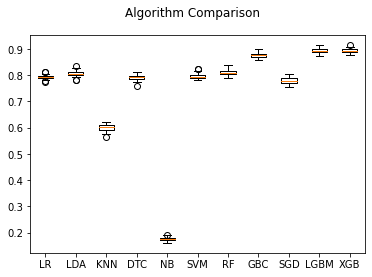

In [8]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from datetime import datetime
import time
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=10000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf')))
models.append(("RF", RandomForestClassifier(n_estimators = 100)))
models.append(("GBC", GradientBoostingClassifier(n_estimators=100)))
models.append(("SGD", SGDClassifier(loss="log", penalty="l2")))
models.append(("LGBM", LGBMClassifier(objective='multiclass', random_state=5)))
models.append(("XGB",XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    start_time = time.time()
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=seed)
    cv_results = cross_val_score(model, X_train_scaled, y_train_values, cv=cv, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f) %s seconds" % (name, cv_results.mean(), cv_results.std(), time.time() - start_time)
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Training using LGBM
Since LGBM is the most accurate and time efficient model. We will train our data on that

In [10]:
import pandas as pd
maindir = "/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/"

X_train = pd.read_csv(maindir+"CD8_req_count_RNA_ADT_40_var.csv", index_col=[0])
y_train = pd.read_csv(maindir+"CD8_celltypes.csv")

X_test = pd.read_csv(maindir+"CD8_rerun_counts.csv", index_col=[0])
print(y_train.iloc[:,-1].value_counts())

CM_EM              6426
TEMRA              3259
DP_EM_nonTERMA      789
CM_EM_Senescent     631
CM_EM_TEMRA         491
Name: x, dtype: int64


In [36]:
X_test.index = X_test.loc[:,"Row.names"]

In [11]:
y_train.iloc[:,-1].value_counts()
y_train_float = y_train.iloc[:,-1].map({"CM_EM_TEMRA":0,"CM_EM_Senescent":1,"TEMRA":2,"CM_EM":3,"DP_EM_nonTERMA":4})
print(y_train_float.value_counts())
X_test.pop("Row.names")

3    6426
2    3259
4     789
1     631
0     491
Name: x, dtype: int64


In [52]:
# assigning the same column name to both the training and test dataset
import numpy as np
same_column = np.intersect1d(X_train.columns, X_test.columns)
X_train_sel = X_train.loc[:,same_column]
X_test_sel = X_test.loc[:,same_column]

In [53]:
print(X_train_sel.shape,X_test_sel.shape)

(11596, 2336) (3685, 2336)


In [55]:
# To check it worked and same column name are present
X_train_sel.columns.equalsuals(X_test_sel.columns)

True

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)
print(X_train_scaled,X_test_scaled)
print(X_train_scaled.shape, X_test_scaled.shape, y_train_float.shape,)

[[-0.34690533  0.86893289 -0.01762238 ... -0.35153056 -0.02167328
  -0.20294834]
 [-0.34690533 -0.52049703 -0.01762238 ... -0.35153056 -0.02167328
  -0.20294834]
 [-0.34690533 -0.52049703 -0.01762238 ... -0.35153056 -0.02167328
  -0.20294834]
 ...
 [ 1.83816487  0.86893289 -0.01762238 ... -0.35153056 -0.02167328
  -0.20294834]
 [-0.34690533 -0.52049703 -0.01762238 ... -0.35153056 -0.02167328
  -0.20294834]
 [-0.34690533 -0.52049703 -0.01762238 ... -0.35153056 -0.02167328
  -0.20294834]] [[ 1.83816487 -0.52049703 -0.01762238 ...  1.56584875 -0.02167328
  -0.20294834]
 [-0.34690533 -0.52049703 -0.01762238 ... -0.35153056 -0.02167328
  -0.20294834]
 [-0.34690533  0.86893289 -0.01762238 ... -0.35153056 -0.02167328
  -0.20294834]
 ...
 [-0.34690533 -0.52049703 -0.01762238 ... -0.35153056 -0.02167328
   3.77237087]
 [-0.34690533 -0.52049703 -0.01762238 ... -0.35153056 -0.02167328
  -0.20294834]
 [-0.34690533 -0.52049703 -0.01762238 ... -0.35153056 -0.02167328
  -0.20294834]]
(11596, 2336) (3

In [61]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(objective='multiclass',random_state=5)

# training a model
model.fit(X_train_scaled,y_train_float.values)

LGBMClassifier(objective='multiclass', random_state=5)

In [63]:
#Predict the response for test dataset
y_pred = model.predict(X_test_scaled)


In [65]:
import joblib
joblib.dump(model,"/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD8_LGBMC_Run02_03_classifier.joblib")


['/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD8_LGBMC_Run02_03_classifier.joblib']

In [67]:
import numpy as np
np.unique(y_pred, return_counts=True)

(array([0, 1, 2, 3, 4]), array([ 818,    4,  776, 2039,   48]))

In [ ]:
y_pred_df = pd.DataFrame(y_pred.tolist())

y_pred_df_cell_annotation = pd.DataFrame(y_pred_df.iloc[:,-1].map({"CM_EM_TEMRA":0,"CM_EM_Senescent":1,"TEMRA":2,"CM_EM":3,"DP_EM_nonTERMA":4}))

y_pred_df_cell_annotation.to_csv('/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD8_rerun01_celltype_annotation.csv',
                                  header=False,index=False)


In [77]:
y_pred_df = pd.DataFrame(y_pred.tolist())
y_pred_df_cell_annotation = pd.DataFrame(y_pred_df.iloc[:,-1].map({0:"CM_EM_TEMRA",1:"CM_EM_Senescent",2:"TEMRA",3:"CM_EM",4:"DP_EM_nonTERMA"}))



In [87]:
y_pred_df_cell_annotation.index = X_test.index

In [90]:
y_pred_df_cell_annotation.to_csv('/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD8_rerun01_celltype_annotation.csv',
                                  header=True,index=True)


## CD4 Old 65 to 80 years 

In [1]:
# We get both the dataset from the Seurat. In Seurat we have identified the variable features for both the RNA (2500) and ADT (10).
# The features has been merged with their raw counts
maindir = "/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/"
import pandas as pd
X_train = pd.read_csv(maindir+"CD4_reference_old.csv",index_col=[0])
y_train = pd.read_csv(maindir+"CD4_reference_celltypes_old.csv")
y_train.iloc[:,-1].value_counts()
y_train_float = y_train.iloc[:,-1].map({"EM_CM":0,"Tregs":1,"Naive_stem_cell_like":2,"CD4_TEMRA":3})
y_train_float.value_counts()
y_train_values = y_train_float.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled.shape,y_train_values.shape)

(20412, 2533) (20412,)


In [2]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RepeatedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
model = LGBMClassifier(objective='multiclass',random_state=5)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=7)
cv_results = cross_val_score(model, X_train_scaled, y_train_values, cv=cv, scoring="accuracy", n_jobs=-1)
print(cv_results.mean())

0.9279018450206931


In [3]:
# training a model
model.fit(X_train_scaled,y_train_float.values)

LGBMClassifier(objective='multiclass', random_state=5)

In [4]:
import joblib
joblib.dump(model,"/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_LGBMC_Run02_03_classifier_old.joblib")


['/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_LGBMC_Run02_03_classifier_old.joblib']

In [ ]:
import joblib
model = joblib.load('/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD4_LGBMC_Run02_03_classifier_old.joblib')


In [5]:
# We have trained our model on 2500 RNA features and 40 ADT features using LGBMC, we will load it.

test_dir = "/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/"
import pandas as pd
X_test = pd.read_csv(test_dir+"CD4_query_count_old.csv",index_col=[0])
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled,X_test_scaled)



[[-0.10488564 -0.09793645 -0.08340405 ... -1.46845929 -0.9847065
  -1.00684005]
 [-0.04354634 -0.09793645 -0.08340405 ...  0.06071914 -0.4562832
  -0.18148211]
 [-0.10488564 -0.09793645  0.06671001 ...  0.44301375 -0.31216776
  -0.31904177]
 ...
 [ 1.48993627 -0.09793645 -0.08340405 ...  0.06071914 -0.50432169
   0.02485738]
 [-0.10488564 -0.09793645 -0.08340405 ... -0.449007    0.02410161
   0.16241704]
 [-0.10488564 -0.09793645 -0.08340405 ... -0.70387007 -0.93666802
  -0.38782159]] [[-0.10488564 -0.09793645 -0.08340405 ...  1.3350345   0.02410161
   0.57509601]
 [-0.10488564 -0.09793645 -0.08340405 ...  0.44301375  1.75348695
   1.05655481]
 [-0.10488564 -0.09793645 -0.08340405 ...  0.44301375  0.79271732
   0.85021532]
 ...
 [-0.10488564 -0.09793645 -0.08340405 ... -1.21359622 -0.60039865
  -0.31904177]
 [-0.10488564 -0.09793645 -0.08340405 ... -1.08616468 -0.07197535
  -0.93806022]
 [-0.10488564 -0.09793645 -0.08340405 ... -0.32157547 -0.16805232
   0.36875652]]


In [6]:
#Predict the response for test dataset
y_pred = model.predict(X_test_scaled)

import numpy as np
np.unique(y_pred, return_counts=True)


(array([0, 1, 2, 3]), array([23191,  6094,  3895,  3119]))

In [7]:
y_pred_df = pd.DataFrame(y_pred.tolist())
y_pred_df_cell_annotation = pd.DataFrame(y_pred_df.iloc[:,-1].map({0:"EM_CM",1:"Tregs",2:"Naive_stem_cell_like",3:"CD4_TEMRA"}))
y_pred_df_cell_annotation.to_csv('/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/celltype_annotation_Old_65_80_LGBMC.csv',
                                  header=False,index=False)


## CD8 Old 65 to 80 years

In [8]:
# We get both the dataset from the Seurat. In Seurat we have identified the variable features for both the RNA (2500) and ADT (10).
# The features has been merged with their raw counts
maindir = "/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/"
import pandas as pd
X_train = pd.read_csv(maindir+"CD8_reference_old.csv",index_col=[0])
y_train = pd.read_csv(maindir+"CD8_reference_celltypes_old.csv")
y_train.iloc[:,-1].value_counts()
y_train_float = y_train.iloc[:,-1].map({"CM_EM_TEMRA":0,"CM_EM_Senescent":1,"TEMRA":2,"CM_EM":3,"DP_EM_nonTERMA":4})
y_train_float.value_counts()
y_train_values = y_train_float.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled.shape,y_train_values.shape)

(11596, 2532) (11596,)


In [9]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RepeatedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
model = LGBMClassifier(objective='multiclass',random_state=5)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=7)
cv_results = cross_val_score(model, X_train_scaled, y_train_values, cv=cv, scoring="accuracy", n_jobs=-1)
print(cv_results.mean())

0.8921472632967383


In [10]:
# training a model
model.fit(X_train_scaled,y_train_float.values)


LGBMClassifier(objective='multiclass', random_state=5)

In [11]:
import joblib
joblib.dump(model,"/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD8_LGBMC_Run02_03_classifier_old.joblib")


['/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD8_LGBMC_Run02_03_classifier_old.joblib']

In [ ]:
import joblib
model = joblib.load('/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/CD8_LGBMC_Run02_03_classifier_old.joblib')


In [12]:
# We have trained our model on 2500 RNA features and 40 ADT features using LGBMC, we will load it.

test_dir = "/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/"
import pandas as pd
X_test = pd.read_csv(test_dir+"CD8_query_count_old.csv",index_col=[0])
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled,X_test_scaled)



[[-0.1090723  -0.17411401 -0.26332886 ... -0.4292491  -0.15528555
   0.14683655]
 [-0.1090723  -0.17411401 -0.26332886 ... -1.2110434  -0.95010559
  -1.46774069]
 [-0.1090723  -0.08177346 -0.09997391 ...  1.24602439  1.27539051
   0.80922721]
 ...
 [-0.1090723  -0.17411401 -0.1326449  ...  1.13433949  1.0634385
   0.31243421]
 [-0.1090723  -0.17411401 -0.06730292 ...  0.12917539  0.16264246
  -0.43275528]
 [-0.1090723  -0.17411401 -0.26332886 ... -0.4292491  -0.89711759
  -0.84674945]] [[ 0.06293165 -0.17411401 -0.26332886 ...  0.68759989  2.07021054
   1.09902312]
 [-0.1090723  -0.17411401 -0.16531589 ...  1.69276399  2.91801858
   2.21680736]
 [-0.1090723  -0.17411401 -0.23065787 ...  1.58107909  0.79849849
   1.8028132 ]
 ...
 [-0.1090723  -0.17411401 -0.26332886 ...  0.57591499  0.26861846
  -0.30855703]
 [-0.1090723  -0.17411401 -0.26332886 ... -0.0941944   0.00367845
   0.85062662]
 [-0.05173765 -0.17411401  0.03071005 ... -0.7643038  -0.36723756
  -0.06016054]]


In [15]:
#Predict the response for test dataset
y_pred = model.predict(X_test_scaled)

import numpy as np
np.unique(y_pred, return_counts=True)


(array([0, 1, 2, 3, 4]), array([ 562,  568, 4671, 8625,  658]))

In [ ]:
y_pred_df = pd.DataFrame(y_pred.tolist())
y_pred_df_cell_annotation = pd.DataFrame(y_pred_df.iloc[:,-1].map({0:"CM_EM_TEMRA",1:"CM_EM_Senescent",2:"TEMRA",3:"CM_EM",4:"DP_EM_nonTERMA"}))
y_pred_df_cell_annotation.to_csv('/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_and_Run03_analysis/downstream_analysis/Integrated_Run/celltype_annotation/celltype_annotation_CD8_Old_65_80_LGBMC.csv',
                                  header=False,index=False)


In [1]:
import pandas as pd

In [3]:
maindir="/research/labs/immunology/goronzy_weyand/GoronzyLab_Mayo/Abhinav/scCITESeq/Ines/Run02_03_04_age_65_80_analysis/GRN/"
aux_mtx = pd.read_csv(maindir+"CD8/CD8_AUC_mat.csv",index_col=[0])


In [4]:
aux_mtx

,BB22016_gE_TTTATGCAGGACAAGA-1,BB22013_gE_AGGGAGTGTATAATGG-1,BB22014_DMSO_GTAACCACACAAACGG-1,BB22015_gE_CATGCAACACTACTTT-1,BB22013_DMSO_AAAGGATCACTGTCGG-1,BB22013_DMSO_AAAGGTACACGGTGTC-1,BB22013_DMSO_AAAGTGAAGTGAATAC-1,BB22013_DMSO_AACAGGGAGCGTTCAT-1,BB22013_DMSO_AACCACAAGAAGCGAA-1,BB22013_DMSO_AAGGTAATCAGCATTG-1,...,gE_BB22004_TTCGGTCTCTATTCGT-1,gE_BB22004_TTCTAACGTCGTACTA-1,gE_BB22004_TTCTCTCCAATTCTTC-1,gE_BB22004_TTCTTGAGTACGAAAT-1,gE_BB22004_TTGCCTGAGCGAACTG-1,gE_BB22004_TTGGATGCATCCCACT-1,gE_BB22004_TTGGGATAGCCAGTAG-1,gE_BB22004_TTGGGATTCTTCGCTG-1,gE_BB22004_TTTACCAAGCAAATGT-1,gE_BB22004_TTTGACTGTCGTTGGC-1
AHR(+),0.050806,0.029821,0.050585,0.039430,0.017230,0.172189,0.067374,0.018997,0.083720,0.082836,...,0.161365,0.062845,0.104042,0.076209,0.050806,0.187652,0.094102,0.104042,0.005633,0.150652
AR(+),0.019881,0.058524,0.000000,0.019011,0.000000,0.000000,0.000000,0.000000,0.000000,0.043365,...,0.000000,0.000000,0.000000,0.083375,0.000000,0.001740,0.000000,0.000000,0.000000,0.000000
ARNT(+),0.048597,0.087530,0.080186,0.005357,0.079468,0.040424,0.071184,0.071847,0.045339,0.009112,...,0.069141,0.105368,0.024520,0.123426,0.085045,0.128507,0.082118,0.100177,0.000000,0.015960
ATF1(+),0.051845,0.059922,0.069862,0.028330,0.039389,0.047807,0.039699,0.027243,0.026280,0.034201,...,0.049888,0.016992,0.057872,0.043147,0.000280,0.063494,0.061692,0.037432,0.026777,0.074708
ATF2(+),0.000000,0.045891,0.000000,0.136680,0.065938,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF880(+),0.060139,0.103877,0.056163,0.000000,0.000000,0.098907,0.000000,0.000000,0.014579,0.000000,...,0.000000,0.000000,0.070080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZNF90(+),0.037247,0.047655,0.049585,0.013566,0.036312,0.044322,0.011870,0.000000,0.028535,0.046018,...,0.032335,0.000000,0.025845,0.045492,0.084902,0.018653,0.026313,0.028125,0.028827,0.026020
ZSCAN31(+),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZSCAN32(+),0.005151,0.044280,0.061540,0.040033,0.079342,0.096512,0.070938,0.090457,0.000000,0.000000,...,0.069131,0.000000,0.053859,0.088198,0.011748,0.046991,0.060546,0.000000,0.047714,0.053136


In [5]:
from pyscenic.binarization import binarize

ModuleNotFoundError: No module named 'pyscenic'